In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib as mpl
from matplotlib import pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_frame = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/secondary_data.csv",sep=";")

In [ ]:
data_frame.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
grouped_by_class = data_frame.groupby('class').agg({'class':['count']}).reset_index()
grouped_by_class.columns = ['class','total']

In [ ]:
grouped_by_class['percentage'] = grouped_by_class['total']*100/len(data_frame)

# Funciones para mapear datos

In [ ]:
def mapear_shapes(caracter):
  traduccion = {
      'b':'bell',
      'c':'conical',
      'x':'convex',
      'f':'flat',
      's':'shunken',
      'p':'spherical',
      'o':'others'
  }
  return traduccion[caracter]

In [ ]:
def mapear_ring_type(caracter):
  traduccion = {
      'e':'evanescent',
      'c':'cobwebby',
      'r':'flaring',
      'g':'grooved',
      'l':'large',
      'p':'pendant',
      's':'sheathing',
      'z':'zone',
      'y':'scaly',
      'm':'movable',
      'f':'none',
      '?':'unknown',
  }
  return traduccion[caracter]

In [ ]:
def mapear_class(caracter):
  traduccion = {
      'e':'edible',
      'p':'poisonous',
  }
  return traduccion[caracter]

In [ ]:
def mapear_season(caracter):
  traduccion = {
      'a':'autumm',
      's':'spring',
      'u':'summer',
      'w':'winter',
  }
  return traduccion[caracter]

In [ ]:
def mapear_surface(caracter):
  traduccion = {
      'i':'fibrous',
      'g':'grooves',
      'y':'scaly',
      's':'smooth',
      'h':'shiny',
      'l':'leathery',
      'k':'silky',
      't':'sticky',
      'w':'wrinkled',
      'e':'fleshy',
  }
  return traduccion[caracter]

In [ ]:
def mapear_color(caracter):
  traduccion = {
      'n':'brown',
      'b':'buff',
      'g':'gray',
      'r':'green',
      'p':'pink',
      'u':'purple',
      'e':'red',
      'w':'white',
      'y':'yellow',
      'l':'blue',
      'o':'orange',
      'k':'black',
      'f':'none',
  }
  return traduccion[caracter]

In [ ]:
def mapear_gill_atach(caracter):
  traduccion = {
      'a':'adnate',
      'x':'adnexed',
      'd':'decurrent',
      'e':'free',
      's':'sinuate',
      'p':'pores',
      'f':'none',
      '?':'unknown',
      
  }
  return traduccion[caracter]

In [ ]:
def mapear_habitat(caracter):
  traduccion = {
      'h':'heaths',
      'u':'urban',
      'g':'grasses',
      'w':'waste',
      'l':'leaves',
      'p':'paths',
      'f':'none',
      '?':'unknown',
      'd':'woods',
      'm':'meadows',
      
  }
  return traduccion[caracter]

In [ ]:
data_frame["cap-shape"] = data_frame["cap-shape"].map(mapear_shapes)
data_frame["class"] = data_frame["class"].map(mapear_class)
data_frame["season"] = data_frame["season"].map(mapear_season)
data_frame["cap-color"] = data_frame["cap-color"].map(mapear_color)
data_frame["gill-color"] = data_frame["gill-color"].map(mapear_color)
data_frame["habitat"] = data_frame["habitat"].map(mapear_habitat)

# Barplot

In [ ]:
grouped_by_class = data_frame.groupby(["class", "cap-shape"]).agg({"cap-shape":["count"]})

In [ ]:
grouped_by_class = grouped_by_class.reset_index()
grouped_by_class.columns = ["class","shape", "total"]

[Text(0.5, 1.0, 'amount of mushrooms by shape')]

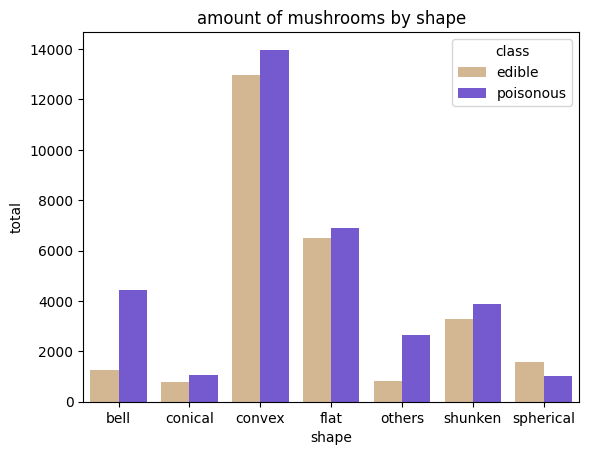

In [ ]:
sns.barplot(data = grouped_by_class, x = 'shape', y = 'total' , hue = 'class', palette = {'edible':'BurlyWood', 'poisonous': '#6b45e3'} ).set(title='amount of mushrooms by shape')

# Heatmap

In [ ]:
grouped_by_color = data_frame.groupby(['cap-color','gill-color','class']).agg({ 'class':['count'] })

In [ ]:
grouped_by_color = grouped_by_color.unstack()

In [ ]:
grouped_by_color = grouped_by_color.reset_index()
grouped_by_color.columns = ["outside_color", "inside_color", "edible", "poisonous"]

In [ ]:
grouped_by_color = grouped_by_color.fillna(0)

In [ ]:
grouped_by_color["prob_poisonous"] = grouped_by_color["poisonous"]*100 / (grouped_by_color.edible + grouped_by_color.poisonous)

In [ ]:
matrix = grouped_by_color.pivot_table(values = 'prob_poisonous', index = "inside_color", columns="outside_color").fillna(0)

Text(77.92222222222227, 0.5, 'color_himenio')

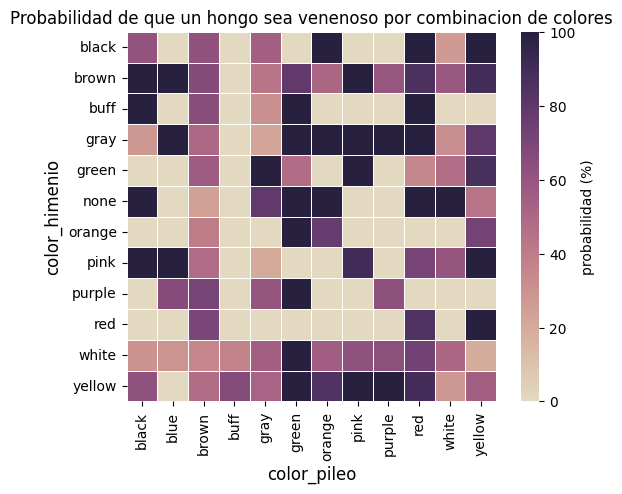

In [ ]:
#sns.set(rc={'figure.figsize':(12.7,5.27)})

cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True )
ax = sns.heatmap(matrix,square=True,cmap=cmap, cbar_kws = {'label': 'probabilidad (%)'}, linewidth = .5) 
### Labels ###
plt.title("Probabilidad de que un hongo sea venenoso por combinacion de colores")
plt.xlabel('color_pileo', fontsize = 12)
plt.ylabel('color_himenio', fontsize = 12) 

# Boxplot

Text(0, 0.5, 'Altura del tallo')

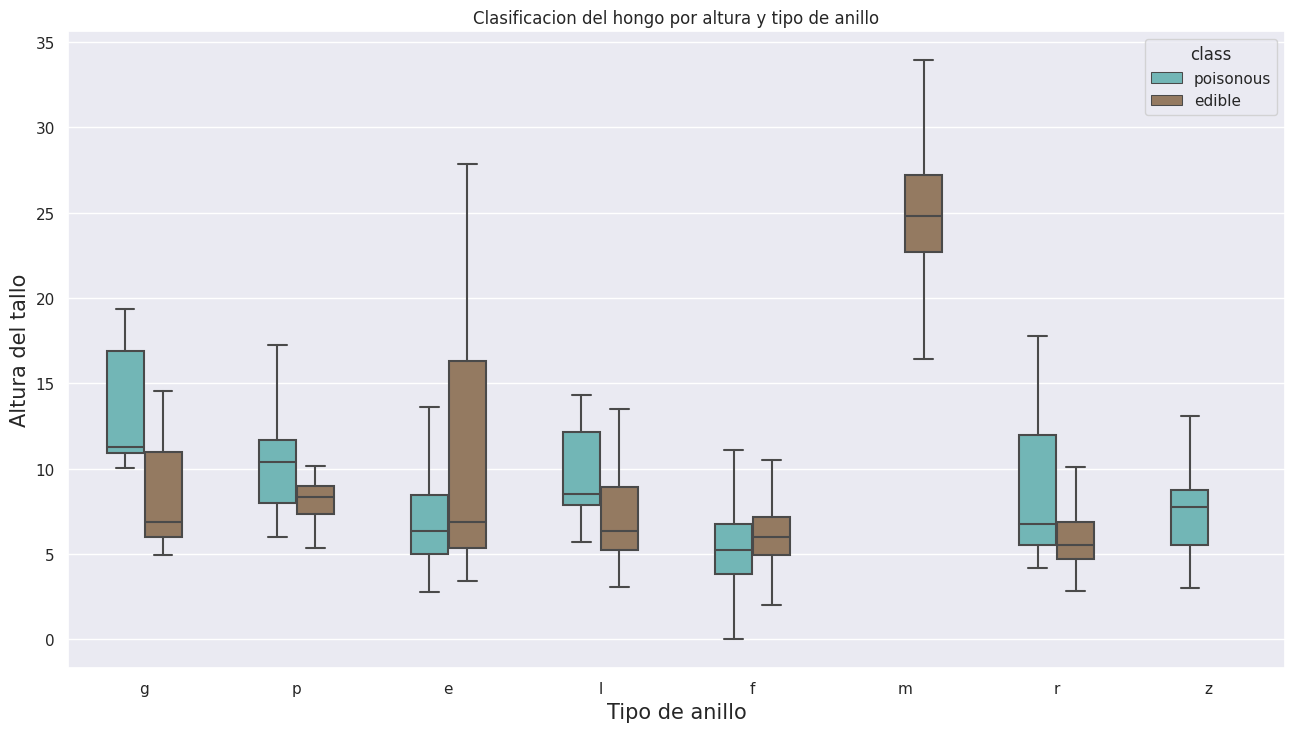

In [ ]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.boxplot(data = data_frame, x ='ring-type' , y='stem-height', hue = 'class',width=0.5,fliersize=False,palette=["#66c2c2", "#9c7a59"])

plt.title("Clasificacion del hongo por altura y tipo de anillo")
plt.xlabel('Tipo de anillo', fontsize = 15)
plt.ylabel('Altura del tallo', fontsize = 15) 